# Analysis of Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import xgboost as xgb


In [ ]:
df = pd.read_csv("/Users/callum/Work/Projects/Student_Depression_Analysis/Student Depression Dataset.csv")


In [30]:
df.head(5)

#print(set(df["City"]))
#print(set(df["Profession"]))
#print(set(df["Sleep Duration"]))
#print(set(df["Dietary Habits"]))

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1
1,8,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,0,3.0,2.0,1,0
2,26,1,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,0,9.0,1.0,1,0
3,30,1,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,1,4.0,5.0,1,1
4,32,1,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,1,1.0,1.0,0,0


Clean Data

In [31]:
df['Gender'] = np.where(df['Gender'] == "Male", 0, 1)
df['Have you ever had suicidal thoughts ?'] = np.where(df['Have you ever had suicidal thoughts ?'] == "No", 0, 1)
df['Family History of Mental Illness'] = np.where(df['Family History of Mental Illness'] == "No", 0, 1)

hours_sleep_mapping = {'Others':0, 'Less than 5 hours': 1, '5-6 hours': 2, '7-8 hours': 3, 'More than 8 hours': 4}

Dietary_Habits= {'Others':0, 'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3}


df['Sleep Duration'] = df['Sleep Duration'].map(hours_sleep_mapping)


df['Dietary Habits'] = df['Dietary Habits'].map(Dietary_Habits)


# List of columns to exclude
exclude_columns = ['City', 'Profession', 'Degree']

# Select all columns except those in the exclude list
df_filtered = df.drop(columns=exclude_columns)

df_matrix = pd.DataFrame(df_filtered)

Data Diagnostics

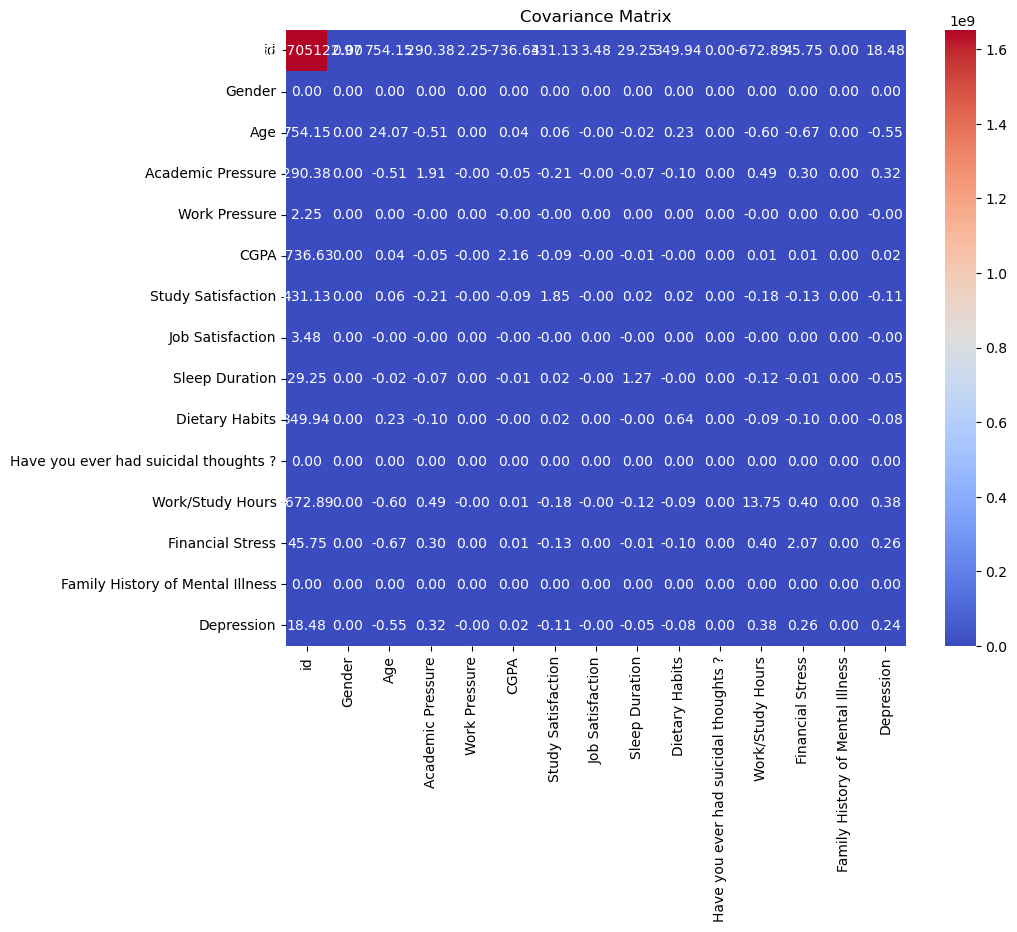

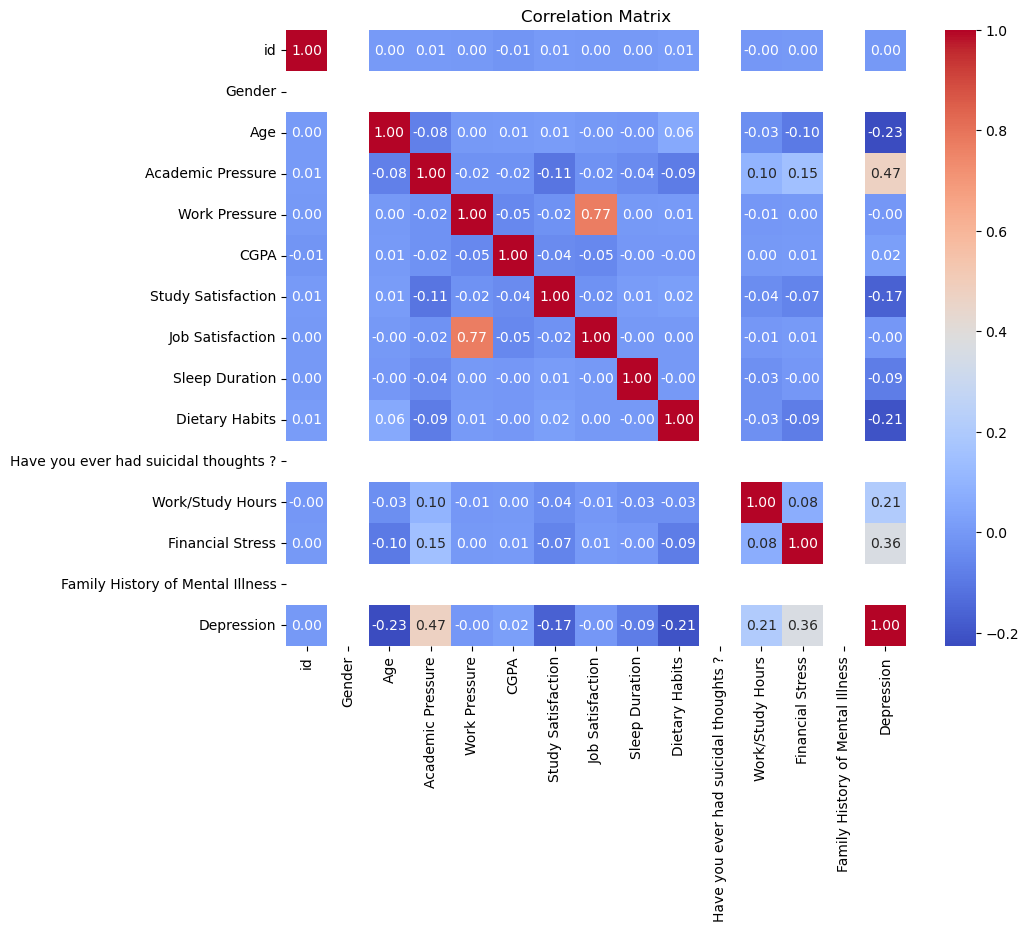

In [32]:

# Compute the covariance matrix
cov_matrix = df_matrix.cov()

# Compute the correlation matrix
corr_matrix = df_matrix.corr()

# Create the covariance heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Covariance Matrix')
plt.show()

# Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()